In [1]:
%pip install seaborn
%pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from importlib import reload
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
dataset = pd.read_csv("dataset.csv")
description = pd.read_csv("description.csv")
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


𝙙𝙖𝙩𝙖𝙨𝙚𝙩 𝙫𝙖𝙡𝙪𝙚 𝙩𝙮𝙥𝙚𝙨 :

In [3]:
dataset.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [4]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Age: This column represents the age of the individuals in the dataset. The statistics provided include the count (number of samples), mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max) values.

Height: This column represents the height of the individuals. The statistics provided are similar to the Age column, describing the count, mean, std, min, 25%, 50%, 75%, and max values.

Weight: This column represents the weight of the individuals. Again, the statistics include count, mean, std, min, 25%, 50%, 75%, and max values.

FCVC (Frequency of Consumption of high-caloric food): This column represents how frequently an individual consumes high-caloric food. The statistics are provided in the same format as the previous columns.

NCP (Number of main meals Consumed Per day): This column represents the number of main meals an individual consumes daily. The statistics follow the same format as the previous columns.

CH2O (Consumption of water per day): This column represents the amount of water an individual drinks daily. The statistics are provided similarly to the other columns.

FAF (Frequency of physical Activity): This column represents the frequency of physical activity for each individual. The statistics are given in the same format as the previous columns.

TUE (Time of use of technological devices): This column represents the amount of time an individual spends using technological devices. The statistics are provided similarly to the other columns.

For each column, the statistics provide an overview of the distribution of values in the dataset, allowing you to understand the central tendency, spread, and range of each feature. These statistics can be helpful in understanding the characteristics of the dataset and making informed decisions during the machine learning project.

In [5]:
description

,Variable,Definition,Key
0,Gender,Gender,"Female, Male"
1,Age,Age in years,Numeric values
2,Height,Height in meters,Numeric values
3,Weight,Weight in Kilograms,Numeric values
4,family_history_with_overweight,Has a family member suffered or suffers from o...,"Yes, No"
5,FAVC,Do you eat high caloric food frequently?,"Yes, No"
6,FCVC,Do you usually eat vegetables in your meals?,"Never, Sometimes, Always"
7,NCP,How many main meals do you have daily?,"Between 1 and 2, 3, More than 3 times"
8,CAEC,Do you eat any food between meals?,"No, Sometimes, Frequently, Always"
9,SMOKE,Do you smoke?,"Yes, No"


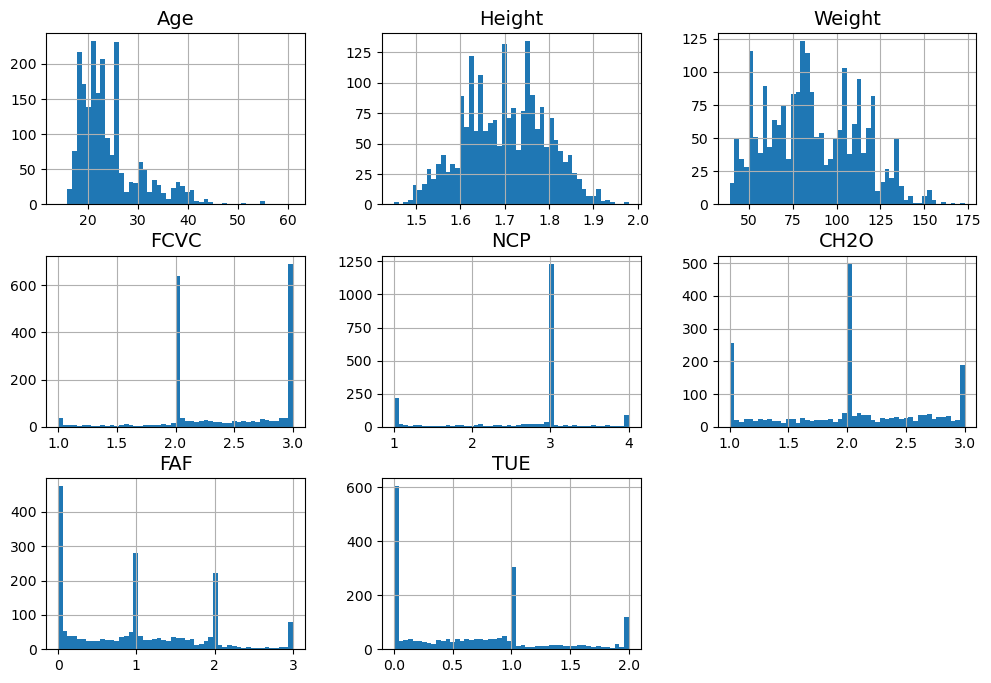

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
dataset.hist(bins=50, figsize=(12, 8))
plt.show()

<font size="7">𝘿𝙖𝙩𝙖 𝘼𝙣𝙖𝙡𝙮𝙨𝙞𝙨</font>

For <font size="3">𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 𝘿𝙖𝙩𝙖 :</font>  

1. Histograms were created to understand distributions.

2. Corrplot 

3. Comparing NObeyesdad levels across numeric variables using pivot table

For <font size="3">𝘾𝙖𝙩𝙚𝙜𝙤𝙧𝙞𝙘𝙖𝙡 𝘿𝙖𝙩𝙖 :</font> 

1. To understand the balance of classes, bar charts were created.

2. To comprehend the relationship with NObeyesdad, pivot tables were created.

In [7]:
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
dataset.describe().columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

<font size="5">𝙎𝙥𝙡𝙞𝙩𝙩𝙞𝙣𝙜 𝙩𝙝𝙚 𝙙𝙖𝙩𝙖𝙨𝙚𝙩 for numerical and categorical values</font>  

In [10]:
df_num = dataset[['Age', 'Height', 'Weight']]
df_cat = dataset[['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']]

<font size="3.5">Showing the 𝙙𝙞𝙨𝙩𝙧𝙞𝙗𝙪𝙩𝙞𝙤𝙣 for all the 𝙣𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 𝙫𝙖𝙡𝙪𝙚𝙨 using 𝙃𝙞𝙨𝙩𝙤𝙜𝙧𝙖𝙢𝙨</font>  

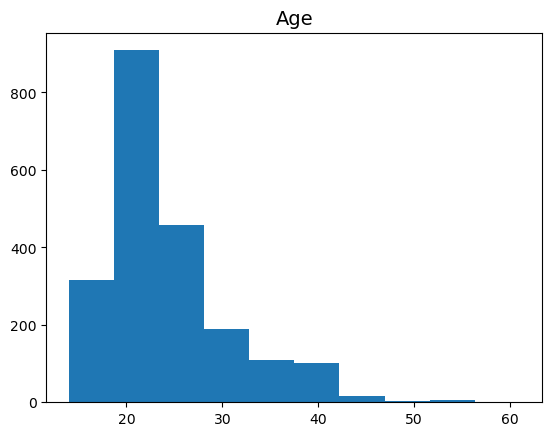

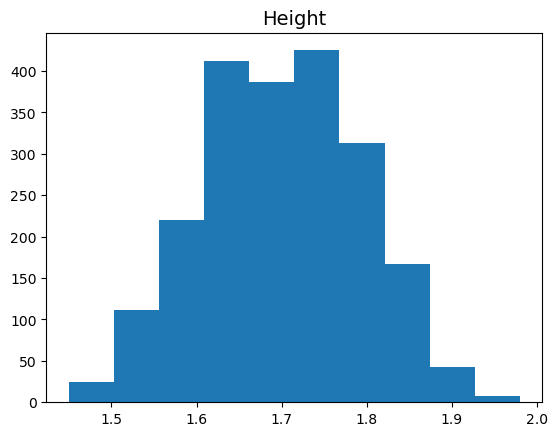

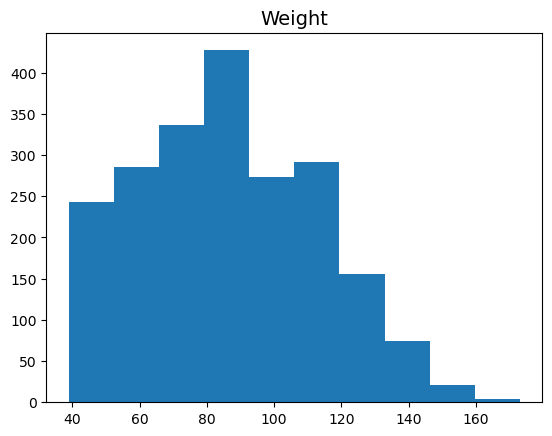

In [11]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<font size="3.5">Showing the 𝘾𝙤𝙧𝙧𝙥𝙡𝙤𝙩 for all the 𝙣𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 𝙫𝙖𝙡𝙪𝙚𝙨</font>  

             Age    Height    Weight
Age     1.000000 -0.025958  0.202560
Height -0.025958  1.000000  0.463136
Weight  0.202560  0.463136  1.000000


<Axes: >

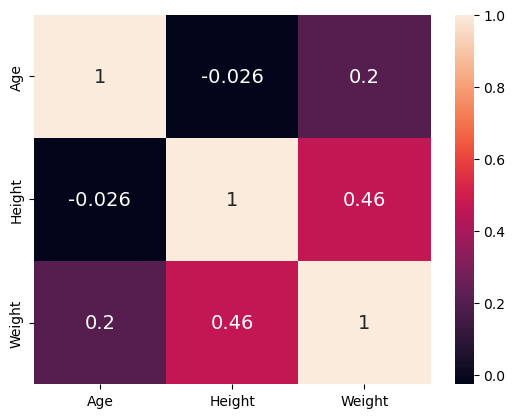

In [12]:
print(df_num.corr())
sns.heatmap(df_num.corr(), annot = True)

<font size="3">
    𝘿𝙚𝙨𝙘𝙧𝙞𝙥𝙩𝙞𝙤𝙣 𝙤𝙛 𝘾𝙤𝙧𝙧𝙥𝙡𝙤𝙩
    
    The correlation matrix is a square matrix that shows the correlation coefficients between pairs of variables. 
    

<font size="3"> In this example, the matrix is 3x3 because there are three variables: "Age," "Height," and "Weight."</font> 
    
<font size="3"> The diagonal elements of the matrix (top-left to bottom-right) represent the correlation of each variable with itself, which is always 1 (perfect positive correlation).</font> 
    
<font size="3"> The off-diagonal elements represent the correlation between different pairs of variables. For example, the value 0.202560 represents the correlation coefficient between "Age" and "Weight," while 0.463136 represents the correlation coefficient between "Height" and "Weight."</font>  


<font size="3.5">Showing the 𝙋𝙞𝙫𝙤𝙩 𝙩𝙖𝙗𝙡𝙚 for all the 𝙣𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 𝙫𝙖𝙡𝙪𝙚𝙨 compared to 𝙉𝙊𝙗𝙚𝙮𝙚𝙨𝙙𝙖𝙙 𝙘𝙤𝙡𝙪𝙢𝙣</font>  

In [13]:
pd.pivot_table(dataset, index = 'NObeyesdad', values = ['Age','Height','Weight'])

,Age,Height,Weight
NObeyesdad,,,
Insufficient_Weight,19.783237,1.691117,49.906330
Normal_Weight,21.738676,1.676585,62.155052
Obesity_Type_I,25.884941,1.693804,92.870198
Obesity_Type_II,28.233785,1.771795,115.305311
Obesity_Type_III,23.495554,1.687559,120.941114
Overweight_Level_I,23.417674,1.687836,74.266828
Overweight_Level_II,26.996981,1.703748,82.085271


<font size="3">
    𝘿𝙚𝙨𝙘𝙧𝙞𝙥𝙩𝙞𝙤𝙣 𝙤𝙛 𝙋𝙞𝙫𝙤𝙩 𝙩𝙖𝙗𝙡𝙚
    
    The output is a pivot table that summarizes the average values of 'Age', 'Height', and 'Weight' for different categories in the 'NObeyesdad' column. The 'NObeyesdad' column contains different categories related to the obesity status of individuals.

The index column of the pivot table represents the unique categories in the 'NObeyesdad' column.

The 'Age', 'Height', and 'Weight' columns are shown as the values in the pivot table.

Each row in the pivot table corresponds to a unique category in the 'NObeyesdad' column, and the values in the 'Age', 'Height', and 'Weight' columns represent the average values for each category.


</font> 

<font size="4">Showing the 𝙙𝙞𝙨𝙩𝙧𝙞𝙗𝙪𝙩𝙞𝙤𝙣 for all the 𝘾𝙖𝙩𝙚𝙜𝙤𝙧𝙞𝙘𝙖𝙡 𝙫𝙖𝙡𝙪𝙚𝙨 using 𝘽𝙖𝙧𝙥𝙡𝙤𝙩𝙨</font>  

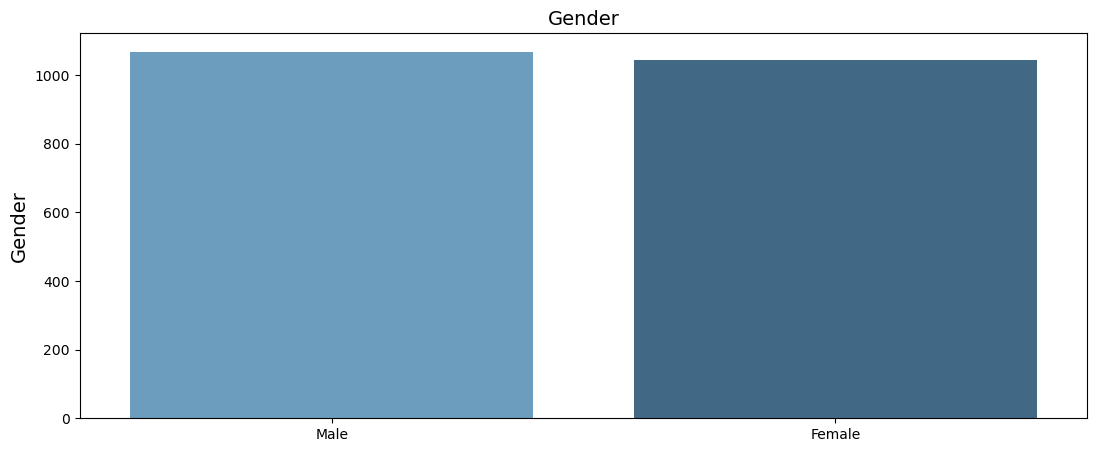

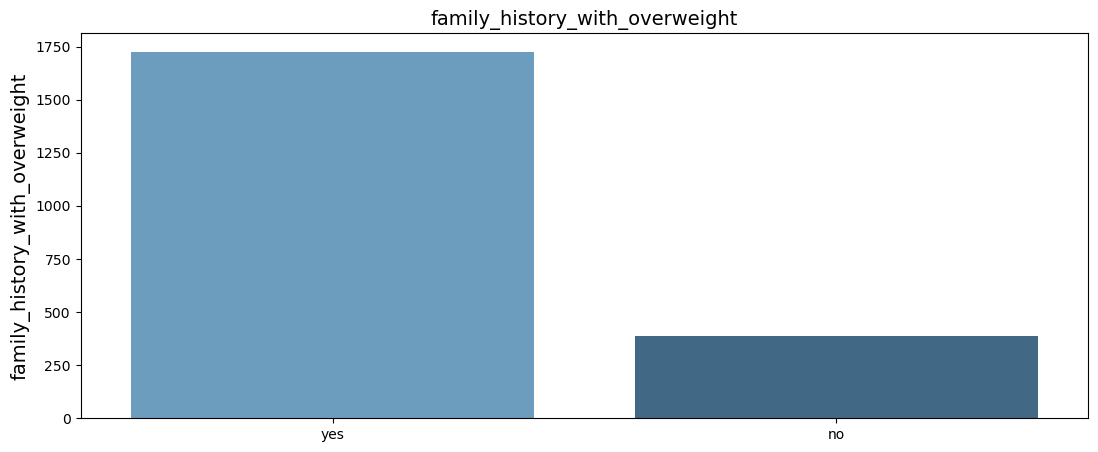

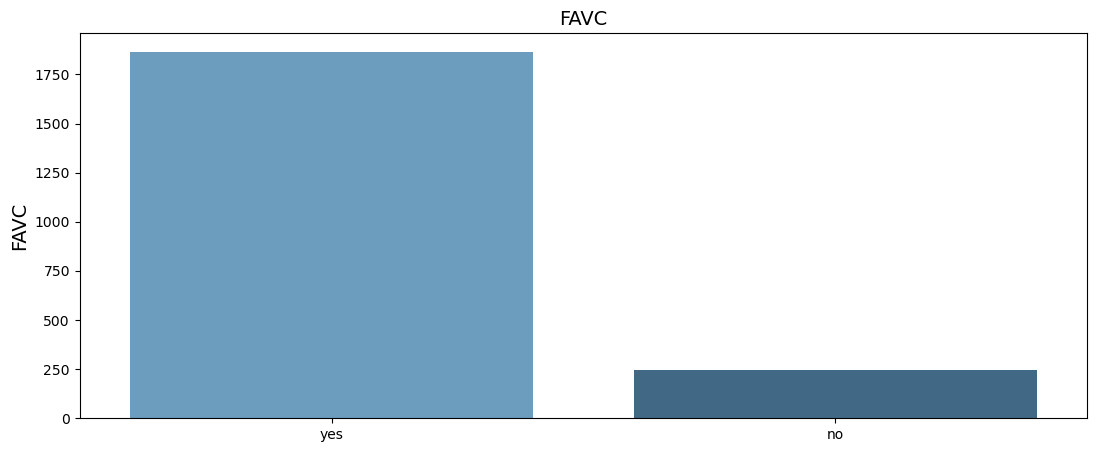

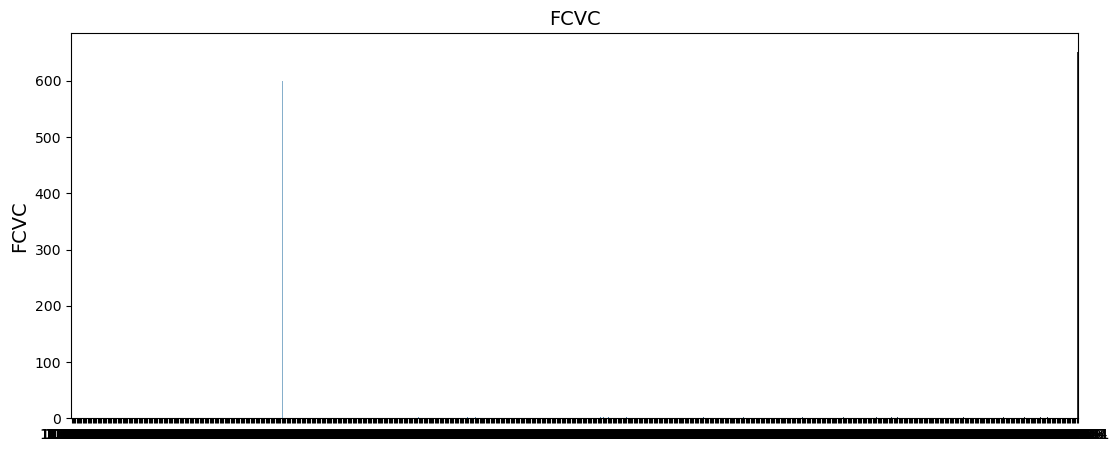

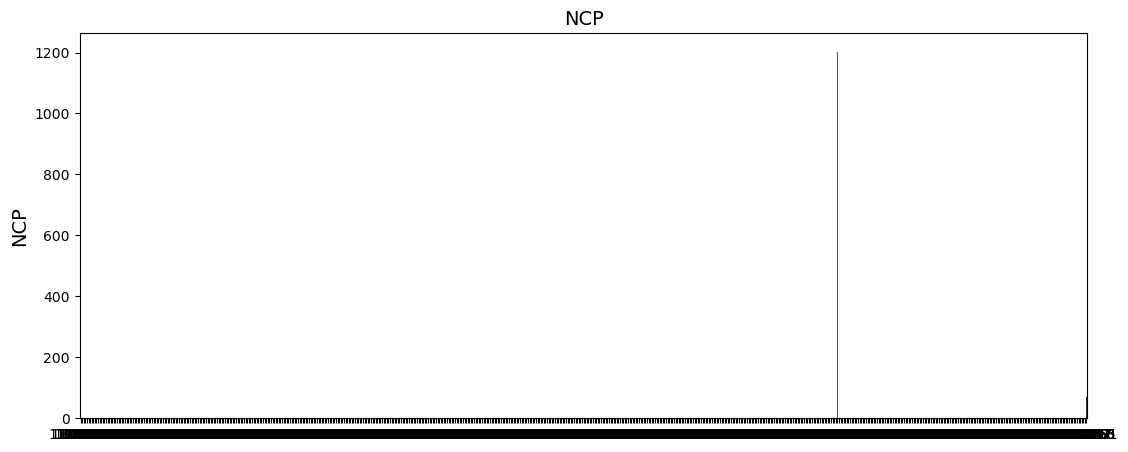

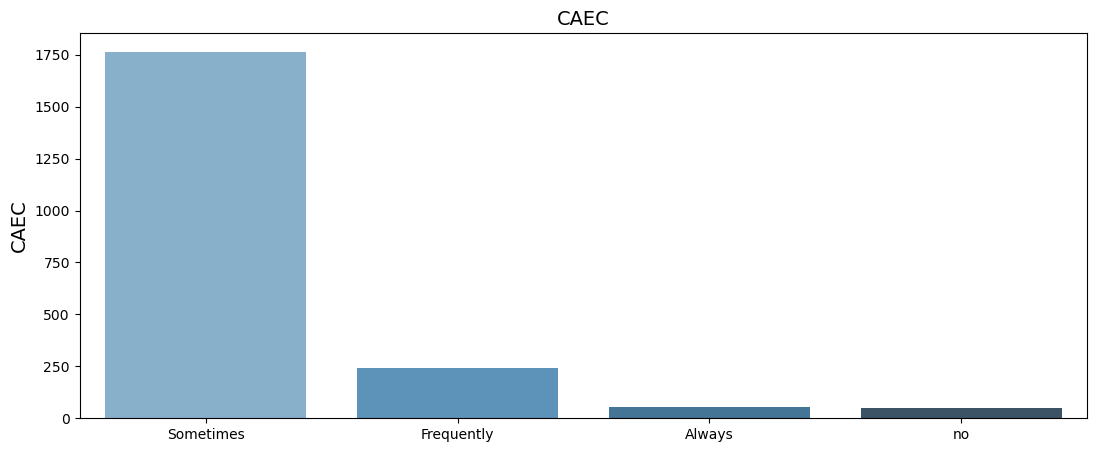

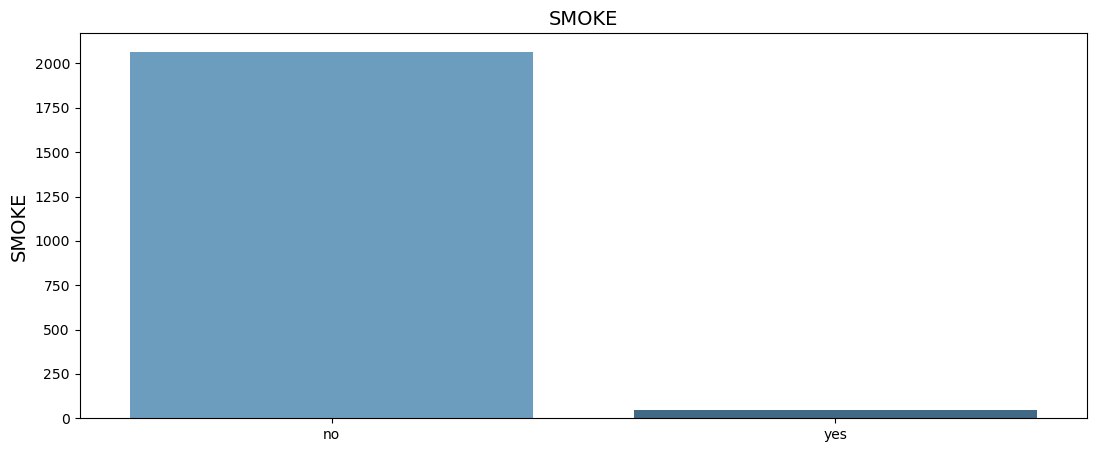

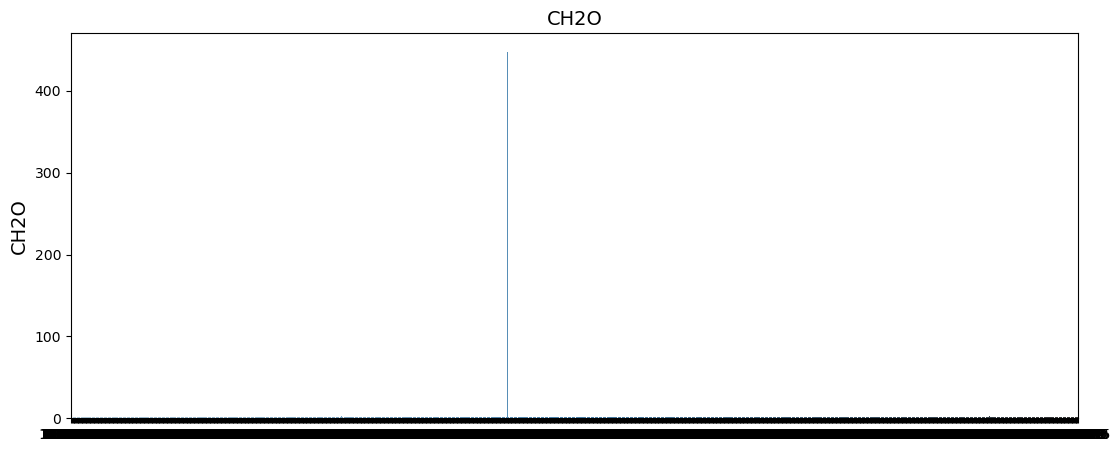

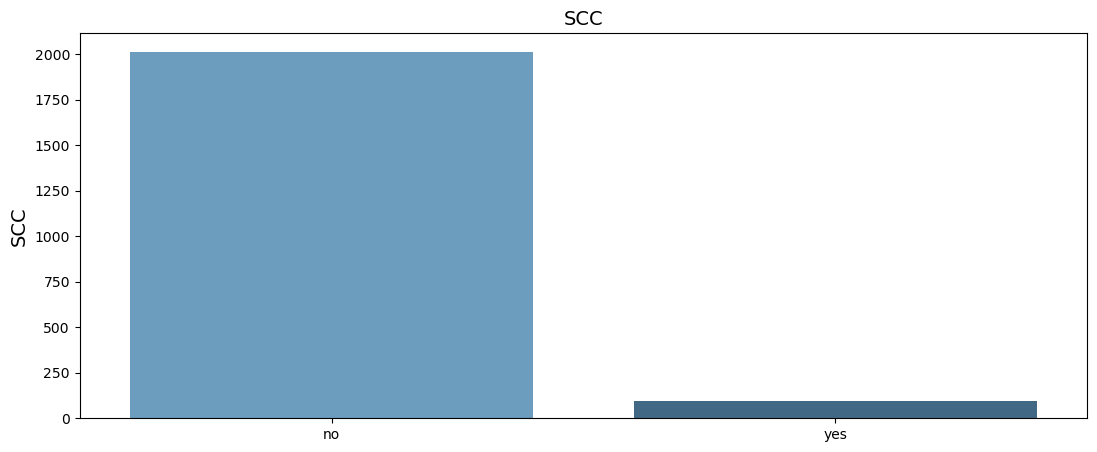

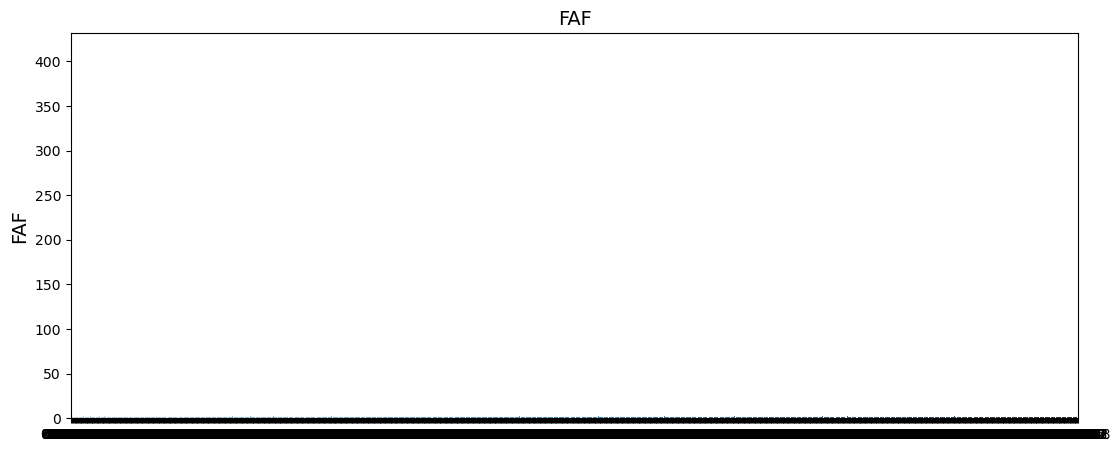

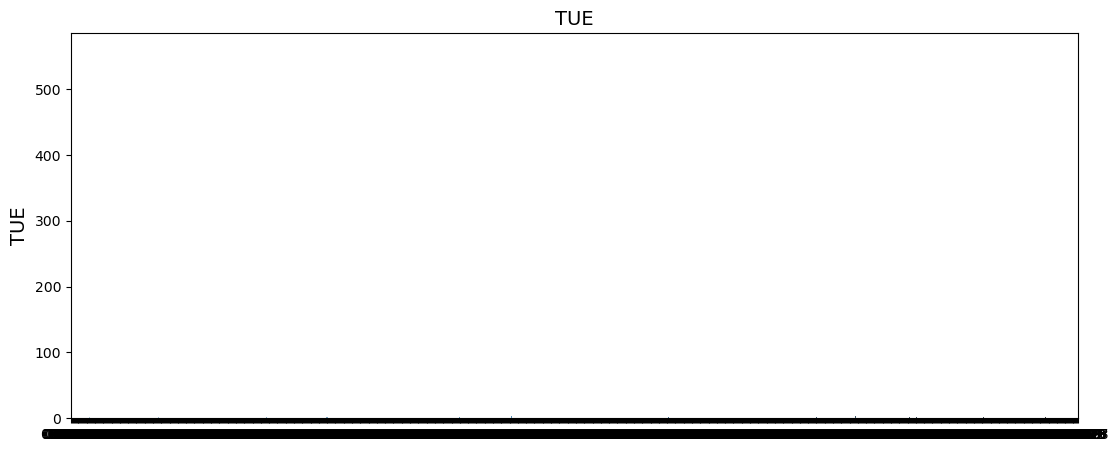

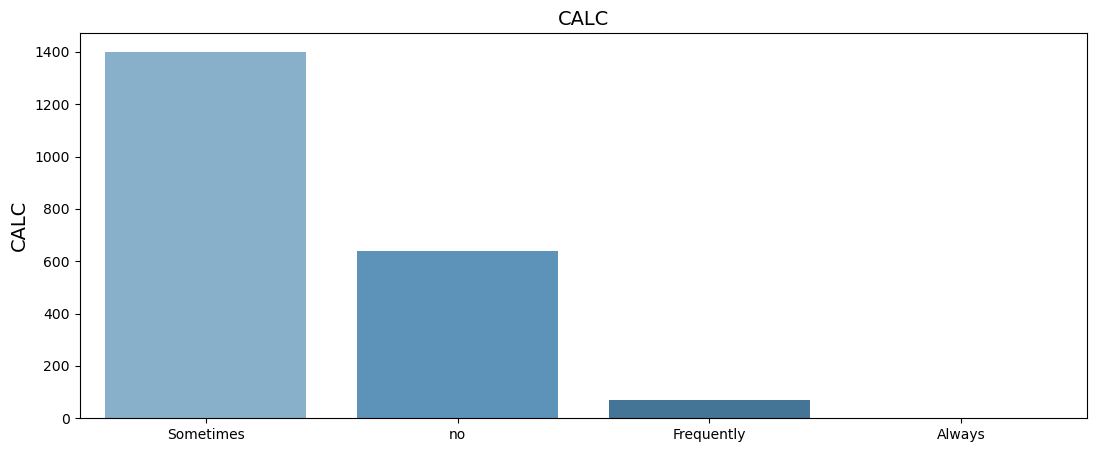

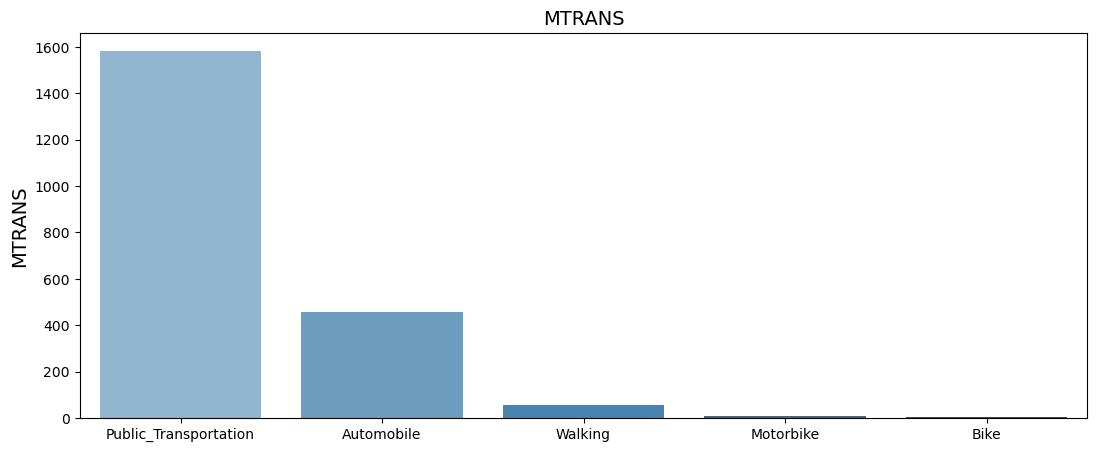

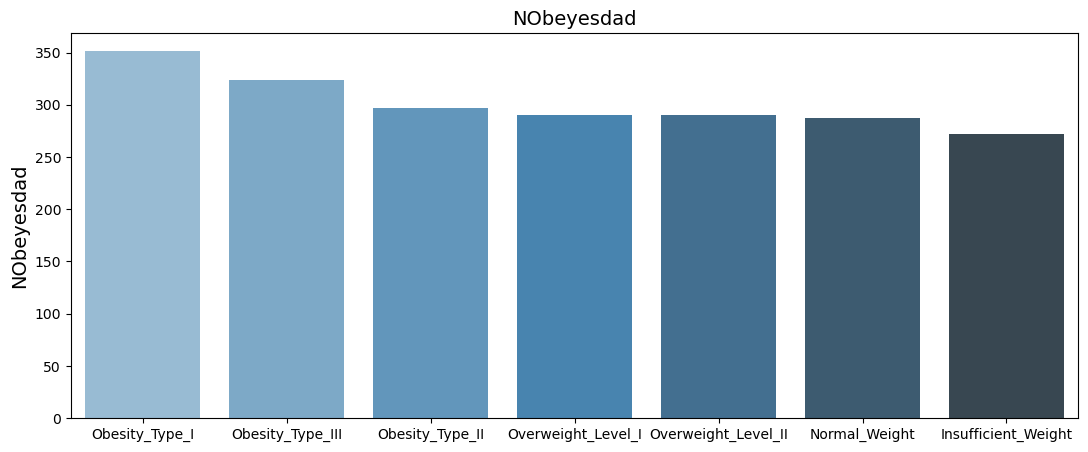

In [14]:
for i in df_cat.columns:
    plt.figure(figsize=(13, 5))
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts(), palette="Blues_d")
    plt.title(i)
    plt.show()

<font size="5"> Comparing each of these categorical features with NObeyesdad </font>

In [15]:
print(pd.pivot_table(dataset, index = 'NObeyesdad', columns = 'Gender', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(dataset, index = 'NObeyesdad', columns = 'family_history_with_overweight', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(dataset, index = 'NObeyesdad', columns = 'FAVC', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(dataset, index = 'NObeyesdad', columns = 'CAEC', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(dataset, index = 'NObeyesdad', columns = 'SMOKE', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(dataset, index = 'NObeyesdad', columns = 'SCC', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(dataset, index = 'NObeyesdad', columns = 'CALC', values = 'FAF' ,aggfunc ='count'))
print()
print(pd.pivot_table(dataset, index = 'NObeyesdad', columns = 'MTRANS', values = 'FAF' ,aggfunc ='count'))

Gender               Female  Male
NObeyesdad                       
Insufficient_Weight     173    99
Normal_Weight           141   146
Obesity_Type_I          156   195
Obesity_Type_II           2   295
Obesity_Type_III        323     1
Overweight_Level_I      145   145
Overweight_Level_II     103   187

family_history_with_overweight     no    yes
NObeyesdad                                  
Insufficient_Weight             146.0  126.0
Normal_Weight                   132.0  155.0
Obesity_Type_I                    7.0  344.0
Obesity_Type_II                   1.0  296.0
Obesity_Type_III                  NaN  324.0
Overweight_Level_I               81.0  209.0
Overweight_Level_II              18.0  272.0

FAVC                 no  yes
NObeyesdad                  
Insufficient_Weight  51  221
Normal_Weight        79  208
Obesity_Type_I       11  340
Obesity_Type_II       7  290
Obesity_Type_III      1  323
Overweight_Level_I   22  268
Overweight_Level_II  74  216

CAEC                 Alwa


<font>The output represents several pivot tables that provide information on the distribution of different categorical variables across categories of the "NObeyesdad" variable.

Pivot table for "Gender": This table shows the count of males and females in each category of "NObeyesdad".

Pivot table for "family_history_with_overweight": This table shows the count of individuals with and without a family history of overweight in each category of "NObeyesdad".

Pivot table for "FAVC": This table shows the count of individuals who eat high caloric food frequently and those who don't in each category of "NObeyesdad".

Pivot table for "CAEC": This table shows the count of individuals who eat food between meals always, frequently, sometimes, or not at all in each category of "NObeyesdad".

Pivot table for "SMOKE": This table shows the count of individuals who smoke and those who don't in each category of "NObeyesdad".

Pivot table for "SCC": This table shows the count of individuals who monitor the calories they eat daily and those who don't in each category of "NObeyesdad".

Pivot table for "CALC": This table shows the count of individuals who drink alcohol always, frequently, sometimes, or not at all in each category of "NObeyesdad".

Pivot table for "MTRANS": This table shows the count of individuals who use different modes of transportation (automobile, bike, motorbike, public transportation, walking) in each category of "NObeyesdad".

<font size="4"> The FCVC, NCP, CH2O, FAF, and TUE plots on the barplot, however, create the primary problem because it's very messy. </font>
    


  <font size="4">Therefore, we used the round function with the following data: age, height, weight, FCVC, NCP, CH20, FAF, and TUE.</font>

In [16]:
df = dataset.copy()

In [17]:
df['Age'] = df['Age'].apply(lambda age : round(age)) 
df['Height'] = df['Height'].apply(lambda height : round(height, 2)) 
df['Weight'] = df['Weight'].apply(lambda weight : round(weight)) 
df['FCVC'] = dataset['FCVC'].apply(lambda fcvc : round(fcvc)) 
df['NCP'] = df['NCP'].apply(lambda ncp : round(ncp)) 
df['CH2O'] = df['CH2O'].apply(lambda ch2o : round(ch2o)) 
df['FAF'] = df['FAF'].apply(lambda faf : round(faf)) 
df['TUE'] = df['TUE'].apply(lambda tue : round(tue))

In [18]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


<font size="7">𝗗𝗮𝘁𝗮 𝗩𝗶𝘀𝘂𝗮𝗹𝗶𝘇𝗮𝘁𝗶𝗼𝗻</font>  

<font size="5">Gender</font>  

<Axes: xlabel='NObeyesdad', ylabel='count'>

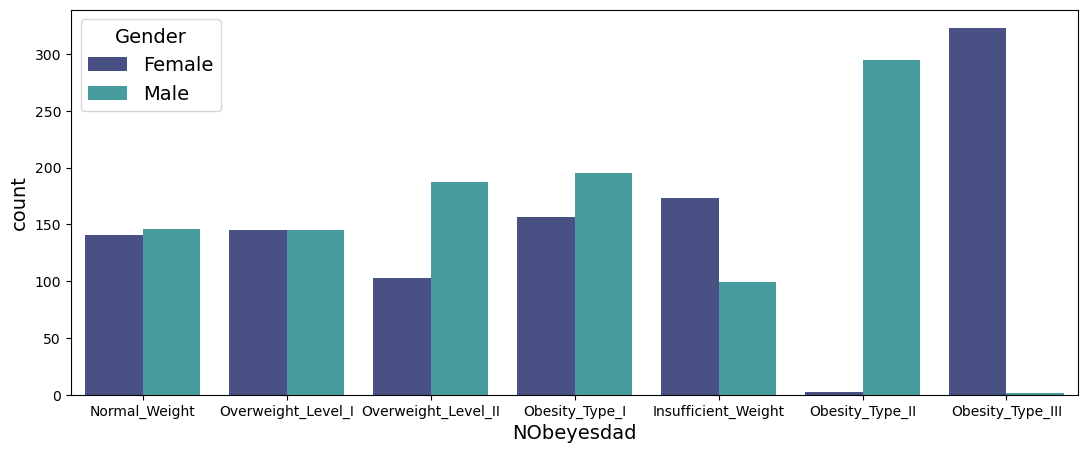

In [19]:
plt.figure(figsize=(13,5)) 
sns.countplot(x='NObeyesdad', hue='Gender', data=df, palette='mako')

<font size="5">Family History With Overweight</font>  

<Axes: xlabel='NObeyesdad', ylabel='count'>

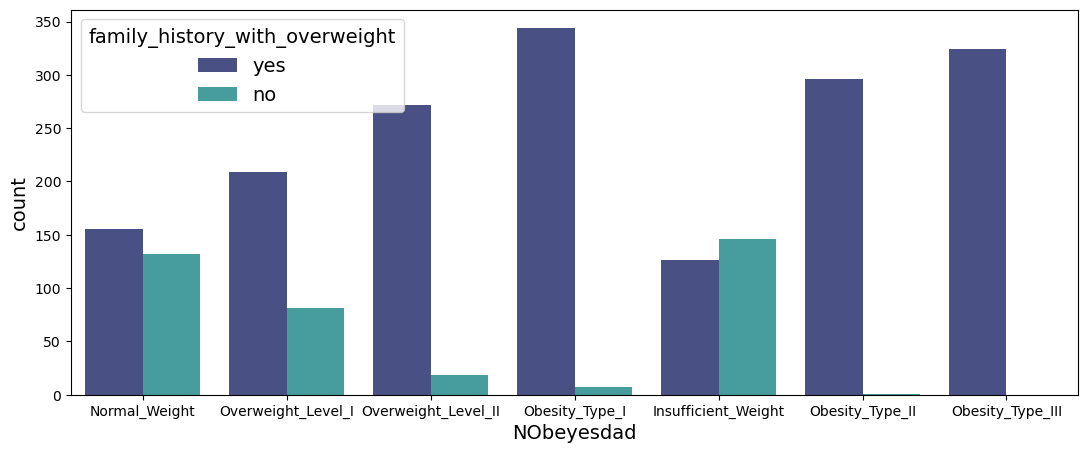

In [20]:
plt.figure(figsize=(13,5)) 
sns.countplot(x='NObeyesdad', hue='family_history_with_overweight', data=df, palette='mako')

<font size="5">Do you eat high caloric food frequently?</font>  

<Axes: xlabel='NObeyesdad', ylabel='count'>

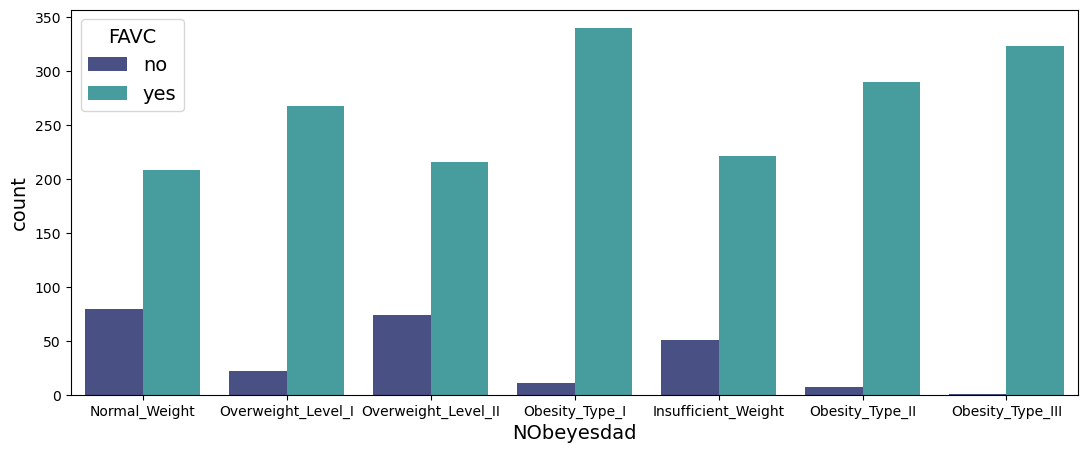

In [21]:
plt.figure(figsize=(13,5)) 
sns.countplot(x='NObeyesdad', hue='FAVC', data=df, palette='mako')

<font size="5">How many main meals do you have daily?</font>  

<Axes: xlabel='NObeyesdad', ylabel='count'>

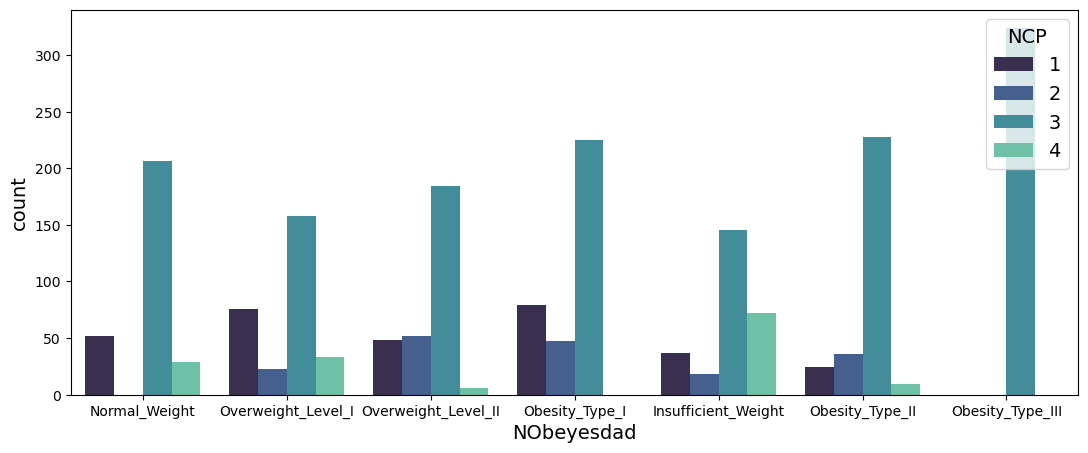

In [22]:
plt.figure(figsize=(13,5))
sns.countplot(x='NObeyesdad', hue='NCP', data=df, palette='mako')

<font size="5">How much water do you drink daily?</font>  

<Axes: xlabel='NObeyesdad', ylabel='count'>

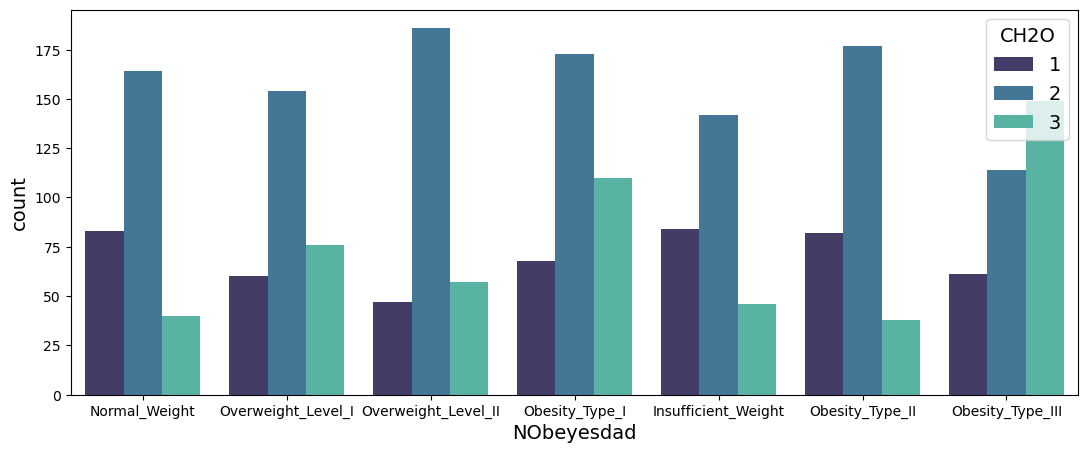

In [23]:
plt.figure(figsize=(13,5))
sns.countplot(x='NObeyesdad', hue='CH2O', data=df, palette='mako')

<font size="5">Which transportation do you usually use?</font>  

<Axes: xlabel='NObeyesdad', ylabel='count'>

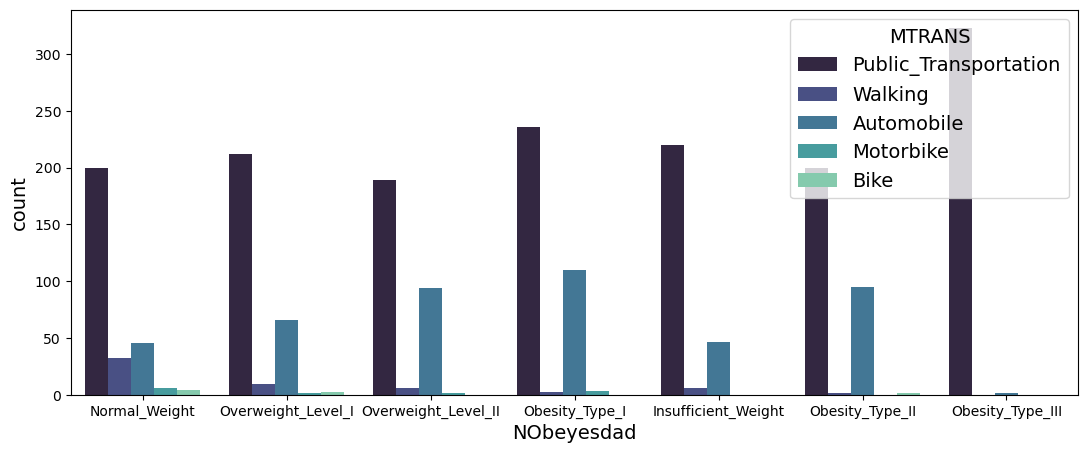

In [24]:
plt.figure(figsize=(13,5))
sns.countplot(x='NObeyesdad', hue='MTRANS', data=df, palette='mako')

<font size="6">𝗢𝘂𝘁𝗹𝗶𝗲𝗿𝘀 𝗗𝗲𝘁𝗲𝗰𝘁𝗶𝗼𝗻</font>  

<font size="3">Outliers are data points that deviate significantly from the majority of the data. Outliers can occur due to various reasons such as data entry errors, measurement errors, or genuine extreme values. Detecting outliers is important Because outliers can affect the performance and accuracy of machine learning models. Models may be overly influenced by outliers, leading to poor generalization. Detecting and treating outliers can help improve the model's performance.</font>  

<font size="4">Box plot for numerical values</font>  

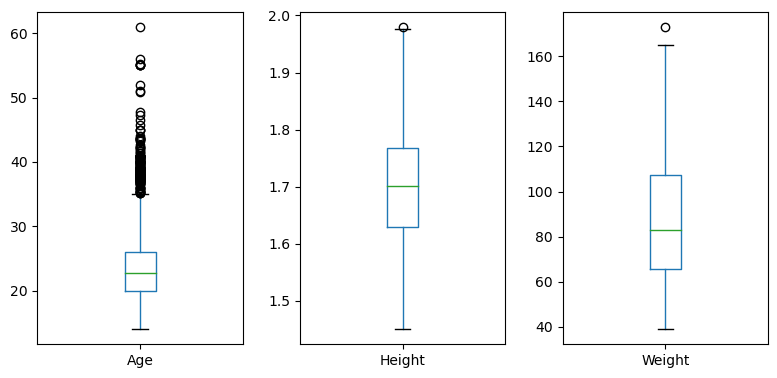

In [25]:
plt.figure(figsize=(8,4))

for i, col in enumerate(list(df_num.columns.values)):
    plt.subplot(1,3,i+1)
    df_num.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [26]:
data_outliers = df.copy()
data_outliers = data_outliers[['Age', 'Height', 'Weight']]

<font size="4">Checking outliers with 𝗭-𝘀𝗰𝗼𝗿𝗲: Age column</font>  

In [27]:

outliers = []

def find_outliers_age(data):
    cut_std = 3
    mean = np.mean(data_outliers['Age'])
    std = np.std(data_outliers['Age'])

    for dataframe in data:

        z_score = (dataframe - mean)/std
        if np.abs(z_score)>=cut_std:
            outliers.append(dataframe)

    return outliers
outliers = find_outliers_age(data_outliers['Age'])
outliers

[52,
 55,
 61,
 44,
 55,
 45,
 51,
 56,
 45,
 55,
 51,
 45,
 55,
 46,
 55,
 48,
 46,
 44,
 44,
 47,
 44,
 44,
 44]

<font size="4">Checking outliers with 𝗭-𝘀𝗰𝗼𝗿𝗲: Weight column</font>  

In [28]:

outliers = []

def find_outliers_weight(data):
    cut_std = 3
    mean = np.mean(data_outliers['Weight'])
    std = np.std(data_outliers['Weight'])

    for dataframe in data:

        z_score = (dataframe - mean)/std
        if np.abs(z_score)>=cut_std:
            outliers.append(dataframe)

    return outliers
outliers = find_outliers_weight(data_outliers['Weight'])
outliers

[173]

<font size="5">Checking outliers with 𝗜𝗻𝘁𝗲𝗿𝗾𝘂𝗮𝗿𝘁𝗶𝗹𝗲 𝗥𝗮𝗻𝗴𝗲: </font> 

<font size="2">The Interquartile Range (IQR) is a statistical measure used to detect and identify outliers in a dataset. It is calculated as the difference between the upper quartile (Q3) and the lower quartile (Q1). Outliers are typically defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.</font> 

 <font size="3">
    Percentile: Age column</font>  

In [29]:
p75, p50 = np.percentile(data_outliers['Age'],[75,50])
print('Percentil 75 - Age column: ', p75)
print('Percentil 50 (median) - Age column: ', p50)

Percentil 75 - Age column:  26.0
Percentil 50 (median) - Age column:  23.0


 <font size="3">
    Percentile: Weight column</font>  

In [30]:
p75, p50 = np.percentile(data_outliers['Weight'],[75,50])
print('Percentil 75 - Weight column: ', p75)
print('Percentil 50 (median) - Weight column: ', p50)

Percentil 75 - Weight column:  107.0
Percentil 50 (median) - Weight column:  83.0


<font size="5">To calculate 𝗜𝗻𝘁𝗲𝗿𝗾𝘂𝗮𝗿𝘁𝗶𝗹𝗲 𝗥𝗮𝗻𝗴𝗲 we follow these steps : </font><br>

<font size="3">1. Calculate the first and third quartiles</font><br>
<font size="3">2. Determine the Interquartile Range</font><br>
<font size="3">3. Find the lower limit Q1 * 1.5</font><br>
<font size="3">4. Find the upper limit Q3 * 1.5 </font>

In [31]:
Q1_Age, Q3_Age = np.percentile(data_outliers['Age'], [25,75])
print('Percentile 25 - Age column: ', Q1_Age)
print('Percentile 75 - Age column: ', Q3_Age)

Percentile 25 - Age column:  20.0
Percentile 75 - Age column:  26.0


In [32]:
Q1_Weight, Q3_Weight = np.percentile(data_outliers['Weight'], [25,75])
print('Percentile 25 - Weight column: ', Q1_Weight)
print('Percentile 75 - Weight column: ', Q3_Weight)

Percentile 25 - Weight column:  65.5
Percentile 75 - Weight column:  107.0


In [33]:
IR_Age = Q3_Age - Q1_Age
print('IR_Age: ', IR_Age)

IR_Weight = Q3_Weight - Q1_Weight
print('IR_Weight: ', IR_Weight)

IR_Age:  6.0
IR_Weight:  41.5


<font size="5"> Now we Calculate the lower and upper limit
 </font>

In [34]:
lower_lim_age = Q1_Age - (1.5 * IR_Age)
upper_lim_age = Q3_Age + (1.5 * IR_Age)

lower_lim_weight = Q1_Weight - (1.5 * IR_Weight)
upper_lim_weight = Q3_Weight + (1.5 * IR_Weight)

print('Lower Limit Age: ', lower_lim_age)
print('Upper Limit Age: ', upper_lim_age)
print()
print('Lower Limit Weight: ', lower_lim_weight)
print('Upper Limit Weight: ', upper_lim_weight)

Lower Limit Age:  11.0
Upper Limit Age:  35.0

Lower Limit Weight:  3.25
Upper Limit Weight:  169.25


<font size="5">In consideration of the 𝗜𝗻𝘁𝗲𝗿𝗾𝘂𝗮𝗿𝘁𝗶𝗹𝗲 𝗥𝗮𝗻𝗴𝗲, I can take into account that:  </font><br>
<font size="3">1. Values in the Age column that are less than 11.0 and more than 35.0 are considered outliers. </font><br>
<font size="3">2. Values in the Weight column that are outliers are those that are less than 3.25 and more than 169.25.
 </font><br>

<font size="6"> 𝗗𝗮𝘁𝗮 𝗣𝗿𝗲𝗽𝗿𝗼𝗰𝗲𝘀𝘀𝗶𝗻𝗴 𝗕𝗲𝗴𝗶𝗻𝘀 </font>

<font size="3">In the data preprocessing we sort all the Categorical values to Numerical values </font><br>
<font size="2">Categorical transformation in machine learning refers to the process of converting categorical variables into a numerical representation that can be used as input for machine learning algorithms. Categorical variables are variables that represent qualitative or non-numeric data, such as gender, color, or product type.</font>

<font size="4">In our dataset we will perform two encodings. <br>
1. One-Hot Encoding<br>
2. Ordinal Encoding
</font>

<font size="4">But first we have to drop the Outliers we found using z-score and IQR method</font>

In [35]:
data_iqr = df.copy()

data_iqr.drop(data_iqr[(data_iqr.Weight > 169.25) | (data_iqr.Weight < 3.25)].index, inplace = True)
data_iqr.drop(data_iqr[(data_iqr.Age > 35.0) | (data_iqr.Age < 11.0)].index, inplace = True)

data_iqr

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,134,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


<font size="4">We can see that we are left with 1950 columns instead of 2111 columns that were in the real dataset </font>

<font size="4">𝗔𝗴𝗲 𝗿𝗮𝗻𝗴𝗲 𝗯𝗼𝘅𝗽𝗹𝗼𝘁 : </font>

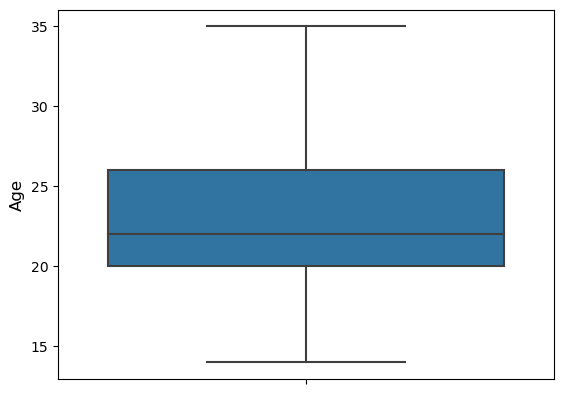

In [36]:
sns.boxplot(y = "Age", data = data_iqr)
plt.yticks(fontsize=10)
plt.ylabel('Age', fontsize=12)
plt.show()

<font size="4">𝗪𝗲𝗶𝗴𝗵𝘁 𝗿𝗮𝗻𝗴𝗲 𝗯𝗼𝘅𝗽𝗹𝗼𝘁 : </font>

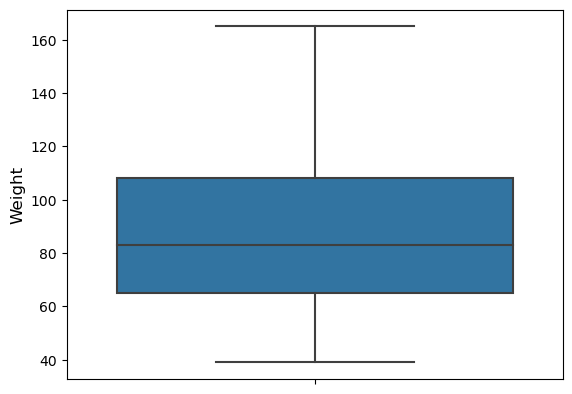

In [37]:
sns.boxplot(y = "Weight", data = data_iqr)
plt.yticks(fontsize=10)
plt.ylabel('Weight', fontsize=12)
plt.show()

<font size="4">Let us look at the columns with their labels </font>

In [38]:
for col in data_iqr.columns:
    print(col, ': ', len(data_iqr[col].unique()), 'labels')

Gender :  2 labels
Age :  22 labels
Height :  51 labels
Weight :  117 labels
family_history_with_overweight :  2 labels
FAVC :  2 labels
FCVC :  3 labels
NCP :  4 labels
CAEC :  4 labels
SMOKE :  2 labels
CH2O :  3 labels
SCC :  2 labels
FAF :  4 labels
TUE :  3 labels
CALC :  4 labels
MTRANS :  5 labels
NObeyesdad :  7 labels


<font size="4">𝗣𝗲𝗿𝗳𝗼𝗿𝗺𝗶𝗻𝗴 𝗢𝗻𝗲-𝗛𝗼𝘁 𝗘𝗻𝗰𝗼𝗱𝗶𝗻𝗴 : [Gender, Family History, FAVC, SMOKE, SSC and MTRANS colums] </font>

<font size="3">This technique represents each category in a categorical variable as a binary feature. It creates a new binary feature for each unique category, and the value is set to 1 if the observation belongs to that category, and 0 otherwise. One-hot encoding is suitable when there is no inherent order or hierarchy among the categories. </font>

In [39]:
data_iqr_ohe = data_iqr.copy()
one_hot_enc = OneHotEncoder(cols=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS'])
data_ohe = one_hot_enc.fit_transform(data_iqr_ohe)
data_ohe

,Gender_1,Gender_2,Age,Height,Weight,family_history_with_overweight_1,family_history_with_overweight_2,FAVC_1,FAVC_2,FCVC,...,SCC_2,FAF,TUE,CALC,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,NObeyesdad
0,1,0,21,1.62,64,1,0,1,0,2,...,0,0,1,no,1,0,0,0,0,Normal_Weight
1,1,0,21,1.52,56,1,0,1,0,3,...,1,3,0,Sometimes,1,0,0,0,0,Normal_Weight
2,0,1,23,1.80,77,1,0,1,0,2,...,0,2,1,Frequently,1,0,0,0,0,Normal_Weight
3,0,1,27,1.80,87,0,1,1,0,3,...,0,2,0,Frequently,0,1,0,0,0,Overweight_Level_I
4,0,1,22,1.78,90,0,1,1,0,2,...,0,0,0,Sometimes,1,0,0,0,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,21,1.71,131,1,0,0,1,3,...,0,2,1,Sometimes,1,0,0,0,0,Obesity_Type_III
2107,1,0,22,1.75,134,1,0,0,1,3,...,0,1,1,Sometimes,1,0,0,0,0,Obesity_Type_III
2108,1,0,23,1.75,134,1,0,0,1,3,...,0,1,1,Sometimes,1,0,0,0,0,Obesity_Type_III
2109,1,0,24,1.74,133,1,0,0,1,3,...,0,1,1,Sometimes,1,0,0,0,0,Obesity_Type_III


In [40]:
data_ohe.select_dtypes(include='object').describe()

,CAEC,CALC,NObeyesdad
count,1950,1950,1950
unique,4,4,7
top,Sometimes,Sometimes,Obesity_Type_III
freq,1618,1311,323


<font size="4">𝗣𝗲𝗿𝗳𝗼𝗿𝗺𝗶𝗻𝗴 𝗢𝗿𝗱𝗶𝗻𝗮𝗹 𝗘𝗻𝗰𝗼𝗱𝗶𝗻𝗴 : [CAEC, CALC and NObeyesdad columns] </font>

<font size="3">Ordinal encoding is suitable for ordinal categorical variables where there is a natural order or hierarchy among the categories. It preserves the ordinal relationship between the categories while converting them into a numerical format that can be used as input for machine learning algorithms.</font>

In [41]:
ord_enc = OrdinalEncoder(mapping= 
[{'col': 'CAEC', 'mapping': {'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3}},
{'col': 'CALC', 'mapping': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}},
{'col':'NObeyesdad','mapping':{'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6}}])
data_ord_enc = ord_enc.fit_transform(data_ohe)
data_ord_enc

,Gender_1,Gender_2,Age,Height,Weight,family_history_with_overweight_1,family_history_with_overweight_2,FAVC_1,FAVC_2,FCVC,...,SCC_2,FAF,TUE,CALC,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,NObeyesdad
0,1,0,21,1.62,64,1,0,1,0,2,...,0,0,1,0,1,0,0,0,0,1
1,1,0,21,1.52,56,1,0,1,0,3,...,1,3,0,1,1,0,0,0,0,1
2,0,1,23,1.80,77,1,0,1,0,2,...,0,2,1,2,1,0,0,0,0,1
3,0,1,27,1.80,87,0,1,1,0,3,...,0,2,0,2,0,1,0,0,0,2
4,0,1,22,1.78,90,0,1,1,0,2,...,0,0,0,1,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,0,21,1.71,131,1,0,0,1,3,...,0,2,1,1,1,0,0,0,0,6
2107,1,0,22,1.75,134,1,0,0,1,3,...,0,1,1,1,1,0,0,0,0,6
2108,1,0,23,1.75,134,1,0,0,1,3,...,0,1,1,1,1,0,0,0,0,6
2109,1,0,24,1.74,133,1,0,0,1,3,...,0,1,1,1,1,0,0,0,0,6


In [42]:
data_ord_enc.describe()

,Gender_1,Gender_2,Age,Height,Weight,family_history_with_overweight_1,family_history_with_overweight_2,FAVC_1,FAVC_2,FCVC,...,SCC_2,FAF,TUE,CALC,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5,NObeyesdad
count,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,...,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
mean,0.485641,0.514359,22.999487,1.705056,86.592308,0.809231,0.190769,0.117949,0.882051,2.431282,...,0.048205,1.018462,0.703077,0.731282,0.805641,0.028205,0.158462,0.004615,0.003077,3.073846
std,0.499922,0.499922,4.379215,0.092363,26.761253,0.393008,0.393008,0.322630,0.322630,0.591669,...,0.214254,0.891593,0.676165,0.507103,0.395808,0.165601,0.365267,0.067797,0.055399,2.036275
min,0.000000,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,1.630000,65.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,22.000000,1.700000,83.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,1.000000,26.000000,1.770000,108.000000,1.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,35.000000,1.980000,165.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


<font size="4">When comparing the mean and standard deviation, it can be seen that the values and scales in the Age and Weight columns are substantially different. </font>

<font size="4">𝗗𝗮𝘁𝗮 𝗶𝗻 𝗕𝗼𝘅𝗽𝗹𝗼𝘁 : </font>

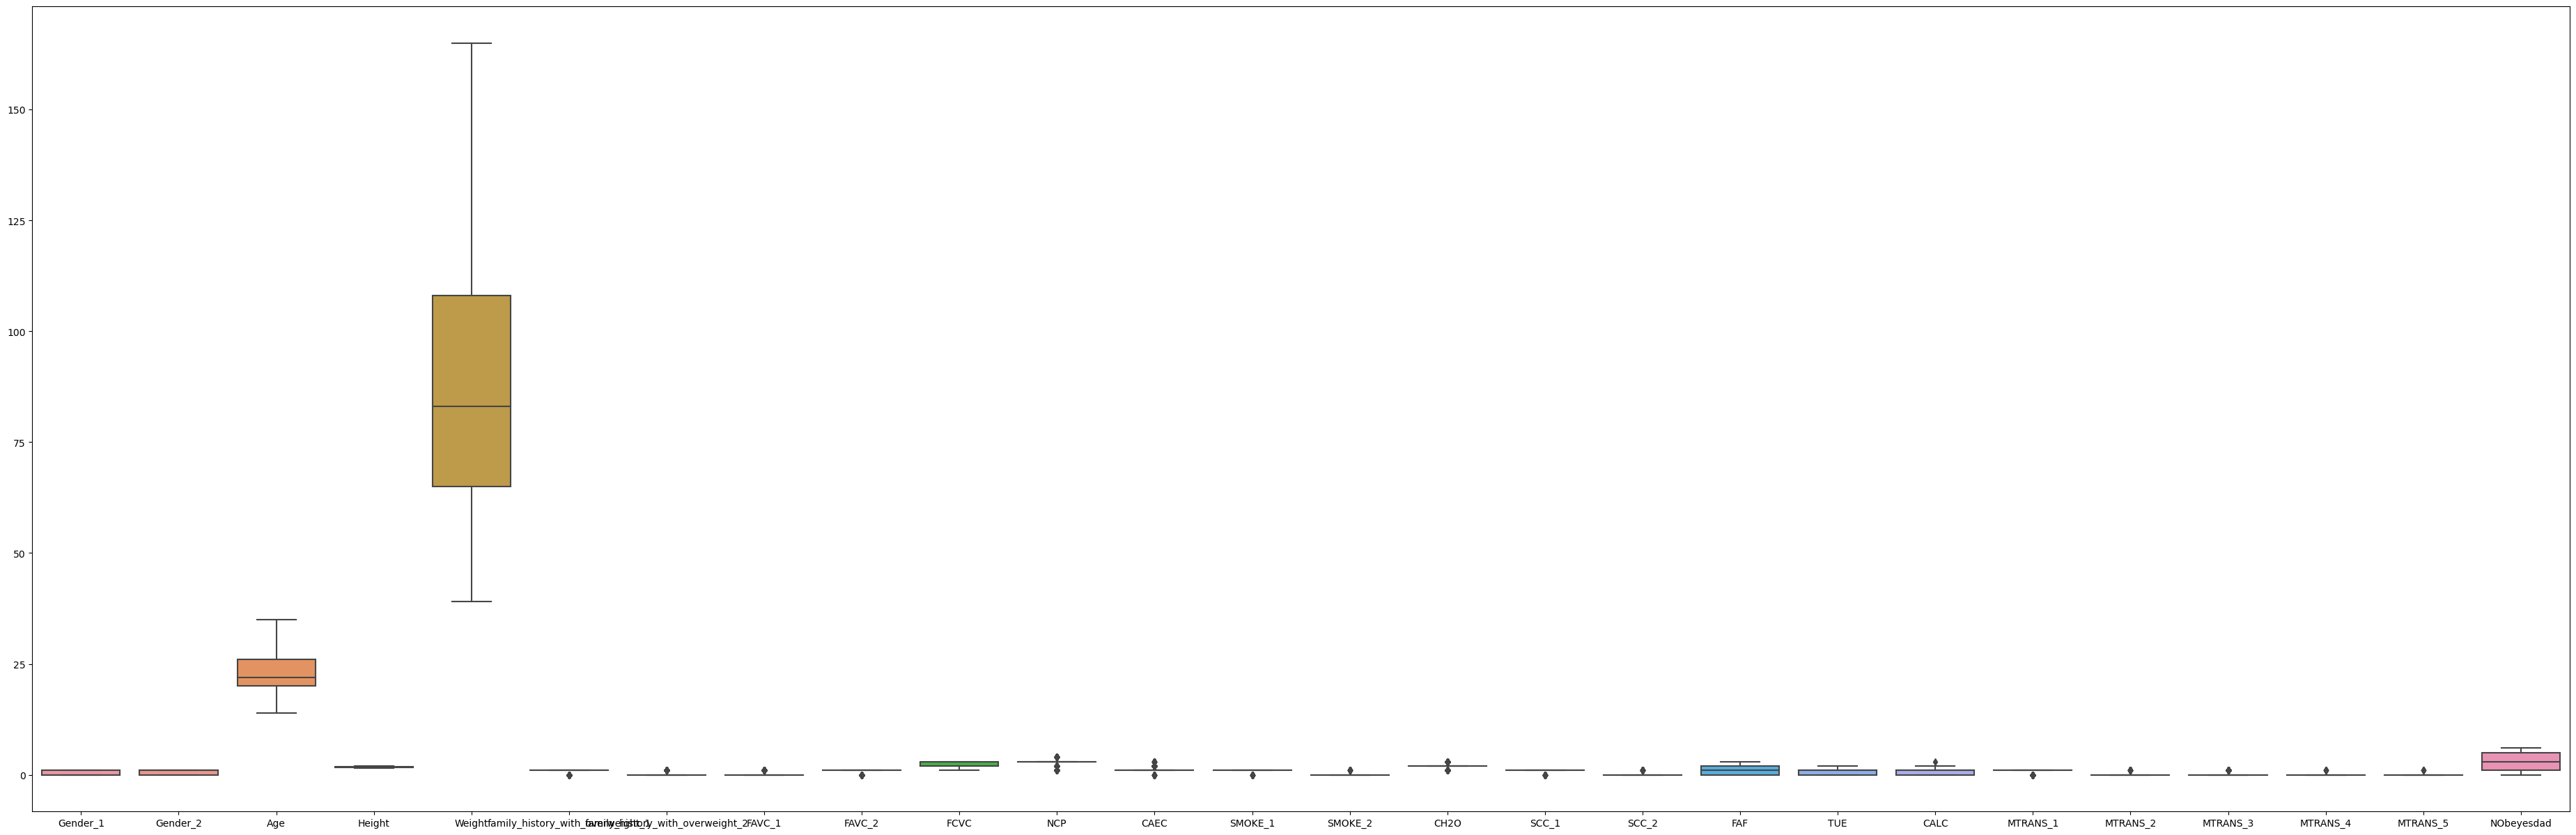

In [43]:
plt.figure(figsize=(47,15)) 
ax = sns.boxplot(data=data_ord_enc)

<font size="4">Due to the varying scales of the data points in the boxplot, it is impossible to view all of the boxes.<br>So, using a typical scaler method, we must scale the data.</font>

<font size="5">𝗦𝘁𝗮𝗻𝗱𝗮𝗿𝗱𝗦𝗰𝗮𝗹𝗲𝗿</font>

<font size="2">The StandardScaler works by calculating the mean (average) and standard deviation of each feature in the dataset. It then subtracts the mean from each value and divides it by the standard deviation. This process ensures that the transformed values have a mean of 0 and a standard deviation of 1.<br>
The formula for standardization is:<Br>
z = (x - u) / s<Br>
Where:<Br>
z is the standardized value[Z-score].<Br>
x is the original value.<Br>
u is the mean of the feature.<Br>
s is the standard deviation of the feature.<Br>
    <Br>
By standardizing the features, the StandardScaler makes them more comparable and brings them to a similar scale. This is particularly useful when features have different scales, as in the case you mentioned where the boxes representing the data points in a boxplot were not visible due to the varying scales.<Br> </font>

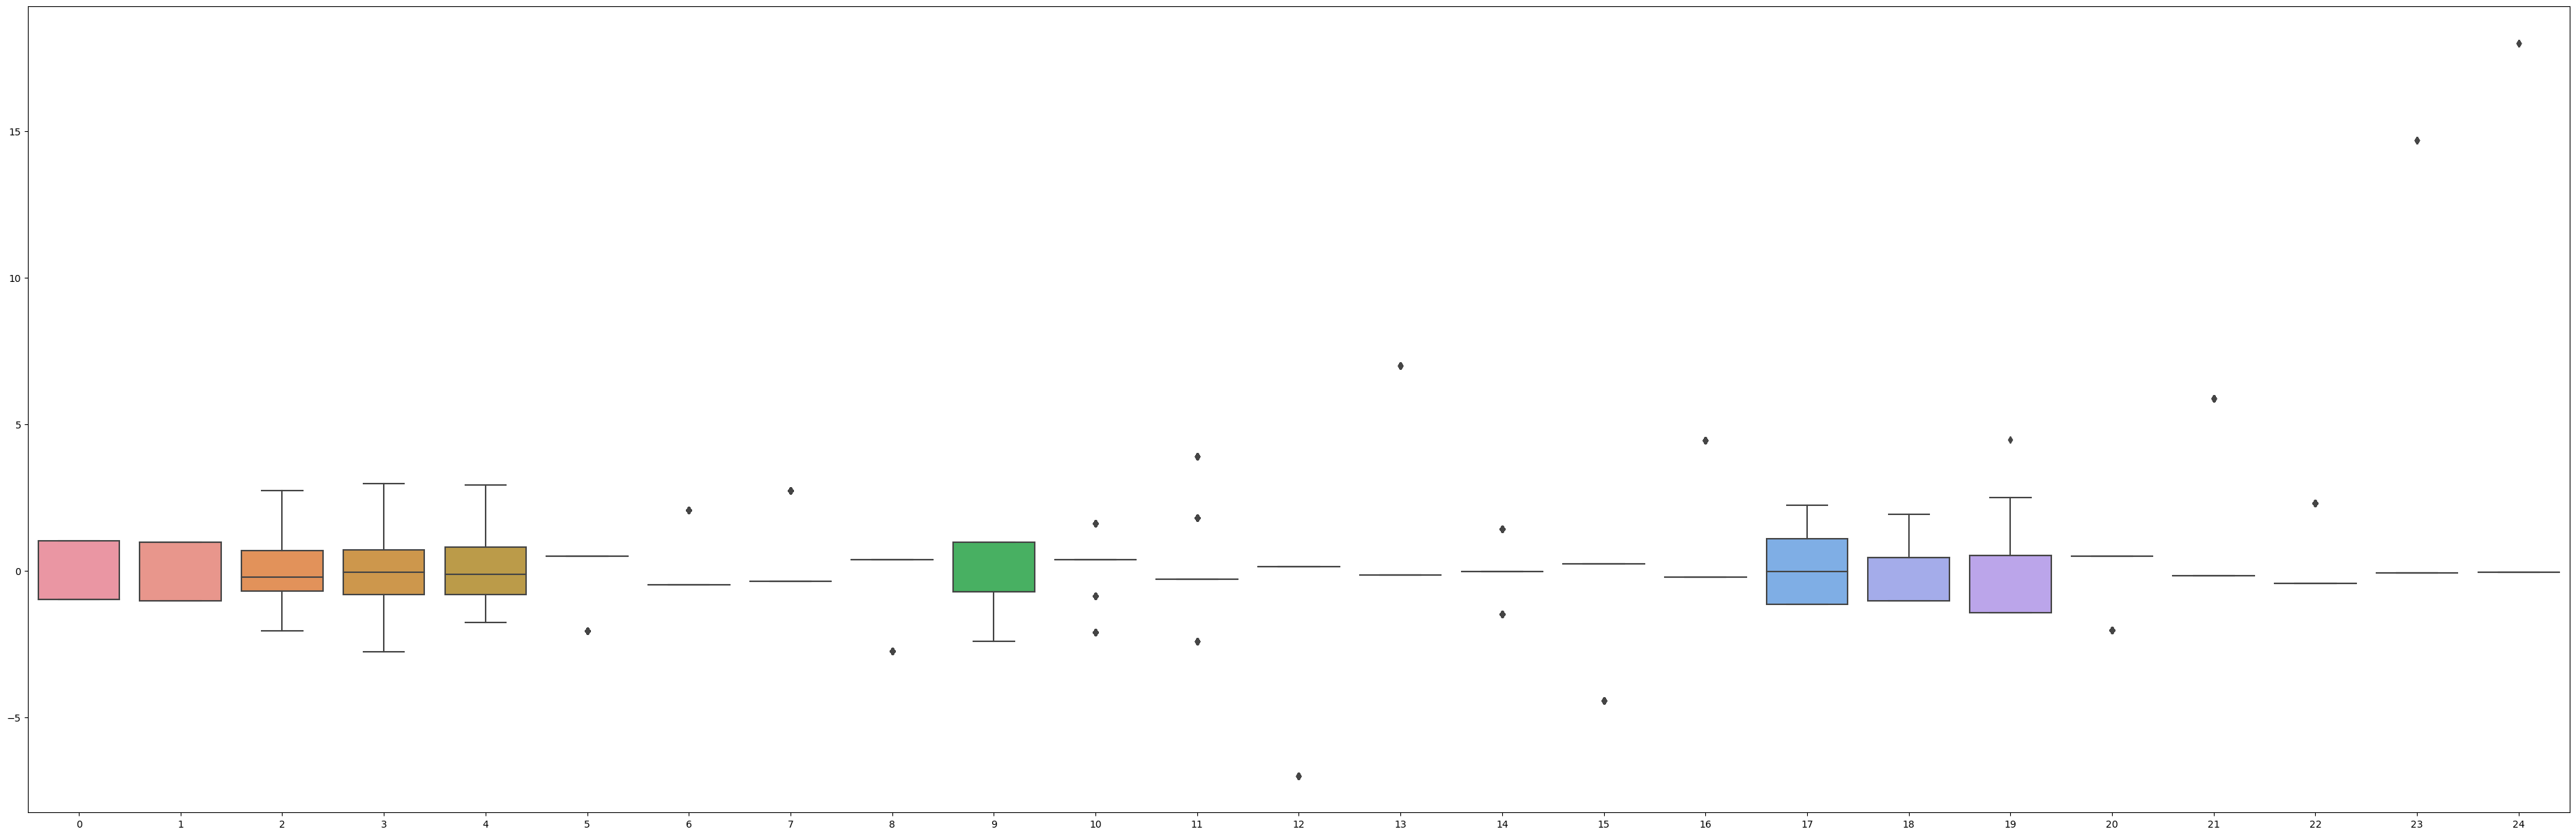

In [44]:
scale = StandardScaler()
scaled_data = data_ord_enc.iloc[:, :-1] 
scaled_data = scale.fit_transform(scaled_data)
# Boxplot to view the scale data
plt.figure(figsize=(47,15)) 
ax = sns.boxplot(data=scaled_data)

<font size="4">The medians are now quite near to zero, as can be observed. </font>

In [45]:
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,...,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1.950000e+03,1950.000000,1.950000e+03,1950.000000,1.950000e+03
mean,-6.194475e-17,6.194475e-17,8.745141e-17,-4.664075e-16,-2.332038e-16,1.749028e-16,8.745141e-17,2.915047e-17,1.457524e-17,-2.477790e-16,...,7.287618e-17,4.372571e-17,-1.020266e-16,2.186285e-17,4.736952e-17,-1.676152e-16,0.000000,1.821904e-17,0.000000,-2.550666e-17
std,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,...,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257,1.000257e+00,1.000257,1.000257e+00
min,-9.716828e-01,-1.029142e+00,-2.055573e+00,-2.762150e+00,-1.778860e+00,-2.059596e+00,-4.855321e-01,-3.656787e-01,-2.734641e+00,-2.419677e+00,...,-4.443499e+00,-2.250479e-01,-1.142587e+00,-1.040067e+00,-1.442448e+00,-2.035956e+00,-0.170364,-4.339353e-01,-0.068094,-5.555556e-02
25%,-9.716828e-01,-1.029142e+00,-6.851128e-01,-8.128284e-01,-8.070566e-01,4.855321e-01,-4.855321e-01,-3.656787e-01,3.656787e-01,-7.291109e-01,...,2.250479e-01,-2.250479e-01,-1.142587e+00,-1.040067e+00,-1.442448e+00,4.911696e-01,-0.170364,-4.339353e-01,-0.068094,-5.555556e-02
50%,-9.716828e-01,9.716828e-01,-2.282929e-01,-5.475873e-02,-1.342698e-01,4.855321e-01,-4.855321e-01,-3.656787e-01,3.656787e-01,-7.291109e-01,...,2.250479e-01,-2.250479e-01,-2.071154e-02,4.392407e-01,5.300441e-01,4.911696e-01,-0.170364,-4.339353e-01,-0.068094,-5.555556e-02
75%,1.029142e+00,9.716828e-01,6.853471e-01,7.033110e-01,8.001563e-01,4.855321e-01,-4.855321e-01,-3.656787e-01,3.656787e-01,9.614555e-01,...,2.250479e-01,-2.250479e-01,1.101164e+00,4.392407e-01,5.300441e-01,4.911696e-01,-0.170364,-4.339353e-01,-0.068094,-5.555556e-02
max,1.029142e+00,9.716828e-01,2.741037e+00,2.977520e+00,2.930648e+00,4.855321e-01,2.059596e+00,2.734641e+00,3.656787e-01,9.614555e-01,...,2.250479e-01,4.443499e+00,2.223039e+00,1.918549e+00,4.475029e+00,4.911696e-01,5.869799,2.304491e+00,14.685594,1.800000e+01


<font size="6">𝗣𝗲𝗿𝗳𝗼𝗿𝗺𝗶𝗻𝗴 𝗥𝗲𝗴𝗿𝗲𝘀𝘀𝗶𝗼𝗻 : </font>

<font size="3">We performed OLS Regression and Linear Regression and later we performed Logistic Regression </font>

<font size="5">𝗢𝗟𝗦 [Ordinary least squares] 𝗥𝗲𝗴𝗿𝗲𝘀𝘀𝗶𝗼𝗻 : </font>

In [46]:
X = data_ord_enc.iloc[:, :-1]
y = data_ord_enc.iloc[:,-1]

X = sm.add_constant(X)
model = sm.OLS(y,X) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2132.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:16:01   Log-Likelihood:                -1139.8
No. Observations:                1950   AIC:                             2320.
Df Residuals:                    1930   BIC:                             2431.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<br><font size="2">Here we get High R squeared Value is 0.955 which is 95.5% accurate. But The p-values associated with each coefficient estimate are very small (close to 0), indicating that all the coefficients, except for the constant term, are statistically significant at conventional levels of significance. This suggests that the corresponding features have a significant impact on the target variable. </font><br>
<font size="3">Given that the FCVC, CH2O, and TUE columns have large p-values (FCVC=.966, CH2O=.603 and TUE=.781), it is clear that they had no impact on the target under the p-value criterion. </font><br>
<font size="4">𝗦𝗼 𝘄𝗲 𝗱𝗿𝗼𝗽 𝘁𝗵𝗲𝘀𝗲 𝘁𝗵𝗿𝗲𝗲 𝗰𝗼𝗹𝘂𝗺𝗻𝘀 𝗮𝗻𝗱 𝘀𝗲𝗽𝗮𝗿𝗮𝘁𝗲 𝘁𝗵𝗲 𝗱𝗲𝗽𝗲𝗻𝗱𝗮𝗯𝗹𝗲 𝘃𝗮𝗿𝗶𝗮𝗯𝗹𝗲[NObeyesdad] 𝗮𝗻𝗱 𝗶𝗻𝗱𝗲𝗽𝗲𝗻𝗱𝗲𝗻𝘁 𝗩𝗮𝗿𝗶𝗮𝗯𝗹𝗲𝘀[Without FCVC, CH2O, and TUE columns] 𝗶𝗻𝘁𝗼 𝘁𝘄𝗼 𝘀𝗲𝘁𝘀 </font>


In [47]:
X2 = data_ord_enc.drop(['FCVC', 'CH2O', 'TUE', 'NObeyesdad'], axis=1)
y = data_ord_enc.iloc[:,-1]

X2 = sm.add_constant(X2)
model = sm.OLS(y,X2) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     2535.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:16:01   Log-Likelihood:                -1140.0
No. Observations:                1950   AIC:                             2314.
Df Residuals:                    1933   BIC:                             2409.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<font size="4">The R-squared value indicates the proportion of the variance in the dependent variable (NObeyesdad) that is explained by the independent variables in the model. In both cases, the R-squared value is 0.955, which suggests that the model explains approximately 95.5% of the variance in the target variable. </font>

In [48]:
results.params

const                               2.280769
Gender_1                            1.103247
Gender_2                            1.177521
Age                                 0.032054
Height                             -7.484622
Weight                              0.076427
family_history_with_overweight_1    1.300206
family_history_with_overweight_2    0.980563
FAVC_1                              1.122252
FAVC_2                              1.158516
NCP                                 0.045345
CAEC                               -0.144659
SMOKE_1                             1.187133
SMOKE_2                             1.093636
SCC_1                               1.168538
SCC_2                               1.112230
FAF                                -0.079234
CALC                               -0.089802
MTRANS_1                            0.540775
MTRANS_2                            0.410988
MTRANS_3                            0.328396
MTRANS_4                            0.469979
MTRANS_5  

<font size="6">𝗣𝗲𝗿𝗳𝗼𝗿𝗺𝗶𝗻𝗴 𝗟𝗶𝗻𝗲𝗮𝗿 𝗥𝗲𝗴𝗿𝗲𝘀𝘀𝗶𝗼𝗻</font>

In [49]:
X2 = data_ord_enc.drop(['FCVC', 'CH2O', 'TUE', 'NObeyesdad'], axis=1)
y = data_ord_enc.iloc[:,-1].values.reshape(-1,1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.3, random_state=0)

In [51]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [52]:
predictions = lr.predict(X_test)

prediction = np.around(predictions)
prediction = prediction.astype(int)


In [53]:
print('intercept: ', lr.intercept_)
print('coefficient: ', lr.coef_)

intercept:  [8.49751217]
coefficient:  [[-3.35643226e-02  3.35643226e-02  3.43088228e-02 -7.45928391e+00
   7.59449576e-02  1.71416948e-01 -1.71416948e-01 -2.05520883e-02
   2.05520883e-02  4.13876925e-02 -1.48308145e-01  6.68225265e-03
  -6.68225265e-03  5.64057868e-03 -5.64057868e-03 -7.70810635e-02
  -9.74221514e-02  4.36452986e-02  1.36285569e-02 -1.98593784e-01
  -9.52483568e-02  2.36568285e-01]]


In [54]:
X_test.columns

Index(['Gender_1', 'Gender_2', 'Age', 'Height', 'Weight',
       'family_history_with_overweight_1', 'family_history_with_overweight_2',
       'FAVC_1', 'FAVC_2', 'NCP', 'CAEC', 'SMOKE_1', 'SMOKE_2', 'SCC_1',
       'SCC_2', 'FAF', 'CALC', 'MTRANS_1', 'MTRANS_2', 'MTRANS_3', 'MTRANS_4',
       'MTRANS_5'],
      dtype='object')

<font size="4">𝗣𝗲𝗿𝗳𝗼𝗿𝗺𝗮𝗻𝗰𝗲 𝗠𝗲𝘁𝗿𝗶𝗰𝘀 :  </font>

<font size="4">𝗖𝗮𝗹𝗰𝘂𝗹𝗮𝘁𝗶𝗻𝗴 𝗠𝗲𝗮𝗻 𝗔𝗯𝘀𝗼𝗹𝘂𝘁𝗲 𝗘𝗿𝗿𝗼𝗿 </font>

In [55]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, prediction)
print('MAE: {:0.2f}'.format(MAE))

MAE: 0.21


<font size="4">𝗖𝗮𝗹𝗰𝘂𝗹𝗮𝘁𝗶𝗻𝗴 𝗥𝟮 𝗦𝗰𝗼𝗿𝗲 : </font>

In [56]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, prediction)
print('r2_score: {:0.2f}'.format(r2_score))

r2_score: 0.95


<font size="4">𝗖𝗮𝗹𝗰𝘂𝗹𝗮𝘁𝗶𝗻𝗴 𝗖𝗿𝗼𝘀𝘀 𝗩𝗮𝗹𝗶𝗱𝗮𝘁𝗶𝗼𝗻 : </font>

In [57]:
result_cv = cross_val_score(lr, X_test, y_test, cv = 10)
print('Cross Validation: {}'.format(result_cv))
print("%0.2f accuracy with a standard deviation of %0.2f" % (result_cv.mean(), result_cv.std()))

Cross Validation: [0.94246516 0.93980695 0.95957854 0.95475372 0.93143792 0.96420775
 0.94449866 0.96796544 0.95833539 0.94054892]
0.95 accuracy with a standard deviation of 0.01


<font size="4">𝗔𝗰𝗰𝘂𝗿𝗮𝗰𝘆 : 𝟵𝟱% (.𝟵𝟱)</font><br>
<font size="4">𝗪𝗶𝘁𝗵 𝗮 𝗦𝘁𝗮𝗻𝗱𝗮𝗿𝗱 𝗗𝗲𝘃𝗶𝗮𝘁𝗶𝗼𝗻 𝗼𝗳 𝟬.𝟬𝟭 </font>

In [58]:
result_lr = np.concatenate((prediction.reshape(len(prediction),1),y_test.reshape(len(y_test),1)),1)
result_lr

array([[2, 2],
       [5, 5],
       [5, 5],
       ...,
       [6, 6],
       [5, 5],
       [3, 2]])

<font size="4">R2 score = 0.95</font>
<br>
<font size="4">MAE score = 0.21 and this doesn't affect that much</font>
<br>


<font size="6">𝗖𝗹𝗮𝘀𝘀𝗶𝗳𝗶𝗰𝗮𝘁𝗶𝗼𝗻 𝗕𝗲𝗴𝗶𝗻𝘀 :</font>

In [59]:
X_clas = scaled_data
y_clas = data_ord_enc.iloc[:, -1] 

Now we split the scaled data again to the training and test size

In [60]:
scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=.3, random_state=0)

<font size="4.5">𝙉𝙤𝙬 𝙬𝙚 𝙖𝙥𝙥𝙡𝙮 𝙉𝙖𝙞𝙫𝙚 𝘽𝙖𝙮𝙚𝙨 𝙖𝙡𝙜𝙤𝙧𝙞𝙩𝙝𝙢

In [61]:
gnb = GaussianNB()
cv_gnb = cross_val_score(gnb,scaled_X_train,y_train,cv=10)
print(cv_gnb)
print(cv_gnb.mean())

[0.48905109 0.51094891 0.51094891 0.38686131 0.54014599 0.51470588
 0.5        0.52205882 0.46323529 0.47794118]
0.491589738085015


𝘼𝙘𝙘𝙪𝙧𝙖𝙘𝙮 𝙤𝙛 𝙉𝙖𝙞𝙫𝙚 𝘽𝙖𝙮𝙚𝙨 𝙖𝙡𝙜𝙤𝙧𝙞𝙩𝙝𝙢 : 49.1%

<font size="4.5">𝙉𝙤𝙬 𝙬𝙚 𝙖𝙥𝙥𝙡𝙮 𝙇𝙤𝙜𝙞𝙨𝙩𝙞𝙘 𝙍𝙚𝙜𝙧𝙚𝙨𝙨𝙞𝙤𝙣 𝙖𝙡𝙜𝙤𝙧𝙞𝙩𝙝𝙢

In [62]:
lor = LogisticRegression(max_iter = 2000)
cv_lor = cross_val_score(lor,scaled_X_train,y_train,cv=10)
print(cv_lor)
print(cv_lor.mean())

[0.81751825 0.84671533 0.89051095 0.77372263 0.86861314 0.84558824
 0.90441176 0.84558824 0.83088235 0.86029412]
0.8483844997853156


𝙇𝙤𝙜𝙞𝙨𝙩𝙞𝙘 𝙍𝙚𝙜𝙧𝙚𝙨𝙨𝙞𝙤𝙣 𝙎𝙘𝙤𝙧𝙚 : 84.8%

<font size="5">𝙉𝙤𝙬 𝙬𝙚 𝙖𝙥𝙥𝙡𝙮 𝘿𝙚𝙘𝙞𝙨𝙞𝙤𝙣 𝙏𝙧𝙚𝙚 

In [63]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt,scaled_X_train,y_train,cv=10)
print(cv_dt)
print(cv_dt.mean())

[0.94890511 0.95620438 0.89781022 0.9270073  0.91240876 0.91176471
 0.94117647 0.94117647 0.94117647 0.94852941]
0.9326159295835122


𝙒𝙞𝙩𝙝𝙤𝙪𝙩 𝙩𝙝𝙚 𝙨𝙘𝙖𝙡𝙚𝙙 𝙙𝙖𝙩𝙖 𝙏𝙝𝙚 𝙙𝙚𝙘𝙞𝙨𝙞𝙤𝙣 𝙩𝙧𝙚𝙚 𝙨𝙘𝙤𝙧𝙚 𝙞𝙨 93.2%

In [64]:
dt.fit(scaled_X_train,y_train)
prediction_dt = dt.predict(scaled_X_test)
print('Accuracy of Decision Tree: {:.2f}'.format(dt.score(scaled_X_test,y_test)))

Accuracy of Decision Tree: 0.95


𝙒𝙞𝙩𝙝 𝙩𝙝𝙚 𝙨𝙘𝙖𝙡𝙚𝙙 𝙙𝙖𝙩𝙖 𝘼𝙘𝙘𝙪𝙧𝙖𝙘𝙮 𝙤𝙛 𝘿𝙚𝙘𝙞𝙨𝙞𝙤𝙣 𝙏𝙧𝙚𝙚: 95%

<font size="4">𝘾𝙤𝙣𝙛𝙪𝙨𝙞𝙤𝙣 𝙈𝙖𝙩𝙧𝙞𝙭 𝙛𝙤𝙧 𝘿𝙚𝙘𝙞𝙨𝙞𝙤𝙣 𝙏𝙧𝙚𝙚

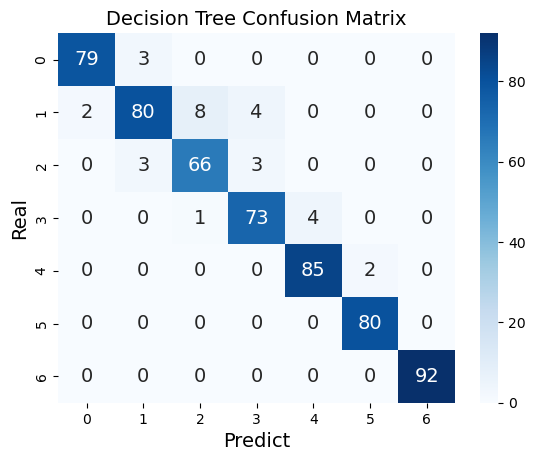

In [65]:
cmdt = confusion_matrix(y_test, prediction_dt)
sns.heatmap(cmdt,annot=True,fmt='g',cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

<font size="5">𝘼𝙥𝙥𝙡𝙮𝙞𝙣𝙜 𝙍𝙖𝙣𝙙𝙤𝙢 𝙁𝙤𝙧𝙚𝙨𝙩

In [66]:
rf = RandomForestClassifier(random_state = 1)
cv_rf = cross_val_score(rf,scaled_X_train,y_train,cv=10)
print(cv_rf)
print(cv_rf.mean())

[0.90510949 0.94160584 0.94160584 0.89781022 0.93430657 0.94852941
 0.96323529 0.90441176 0.93382353 0.94117647]
0.9311614426792614


𝙒𝙞𝙩𝙝𝙤𝙪𝙩 𝙩𝙝𝙚 𝙨𝙘𝙖𝙡𝙚𝙙 𝙙𝙖𝙩𝙖 𝙏𝙝𝙚 𝙍𝙖𝙣𝙙𝙤𝙢 𝙁𝙤𝙧𝙚𝙨𝙩 𝙨𝙘𝙤𝙧𝙚 𝙞𝙨 93.1%

In [67]:
rf.fit(scaled_X_train,y_train)
prediction_rf = rf.predict(scaled_X_test)
print('Accuracy of Random Forest: {:.2f}'.format(rf.score(scaled_X_test,y_test)))

Accuracy of Random Forest: 0.94


𝙒𝙞𝙩𝙝 𝙩𝙝𝙚 𝙨𝙘𝙖𝙡𝙚𝙙 𝙙𝙖𝙩𝙖 𝘼𝙘𝙘𝙪𝙧𝙖𝙘𝙮 𝙤𝙛 𝙍𝙖𝙣𝙙𝙤𝙢 𝙁𝙤𝙧𝙚𝙨𝙩: 94%

<font size="4">𝘾𝙤𝙣𝙛𝙪𝙨𝙞𝙤𝙣 𝙈𝙖𝙩𝙧𝙞𝙭 𝙛𝙤𝙧 𝙍𝙖𝙣𝙙𝙤𝙢 𝙁𝙤𝙧𝙚𝙨𝙩

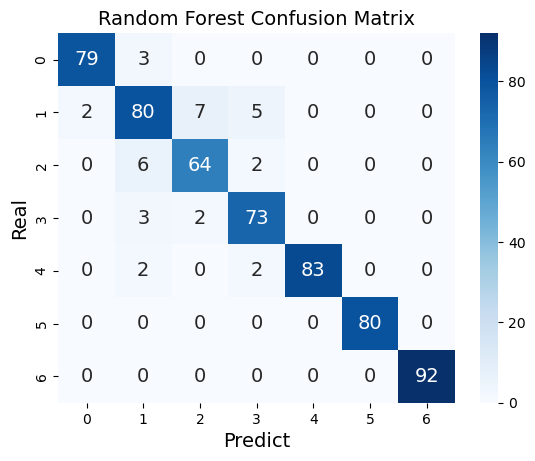

In [68]:
cmrf = confusion_matrix(y_test, prediction_rf)
sns.heatmap(cmrf,annot=True,fmt='g',cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Real")
plt.show()

<font size="4">𝘼𝙥𝙥𝙡𝙮𝙞𝙣𝙜 𝙠-𝙣𝙚𝙖𝙧𝙚𝙨𝙩 𝙣𝙚𝙞𝙜𝙝𝙗𝙤𝙧𝙨 (𝙆𝙉𝙉) 𝙖𝙡𝙜𝙤𝙧𝙞𝙩𝙝𝙢

In [69]:
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn,scaled_X_train,y_train,cv=10)
print(cv_knn)
print(cv_knn.mean())

[0.7810219  0.77372263 0.73722628 0.72262774 0.77372263 0.80147059
 0.81617647 0.74264706 0.75735294 0.79411765]
0.7700085873765565


𝙠-𝙣𝙚𝙖𝙧𝙚𝙨𝙩 𝙣𝙚𝙞𝙜𝙝𝙗𝙤𝙧𝙨 (𝙆𝙉𝙉) 𝙖𝙡𝙜𝙤𝙧𝙞𝙩𝙝𝙢 𝙨𝙘𝙤𝙧𝙚 : 77.0%

<font size="4">𝘼𝙥𝙥𝙡𝙮𝙞𝙣𝙜 𝙎𝙪𝙥𝙥𝙤𝙧𝙩 𝙑𝙚𝙘𝙩𝙤𝙧 𝘾𝙡𝙖𝙨𝙨𝙞𝙛𝙞𝙚𝙧 𝙖𝙡𝙜𝙤𝙧𝙞𝙩𝙝𝙢

In [70]:
svc = SVC(probability = True)
cv_svc = cross_val_score(svc,scaled_X_train,y_train,cv=10)
print(cv_svc)
print(cv_svc.mean())

[0.80291971 0.84671533 0.81021898 0.79562044 0.84671533 0.82352941
 0.86764706 0.86764706 0.80882353 0.84558824]
0.8315425075139544


𝙎𝙪𝙥𝙥𝙤𝙧𝙩 𝙑𝙚𝙘𝙩𝙤𝙧 𝘾𝙡𝙖𝙨𝙨𝙞𝙛𝙞𝙚𝙧 𝙖𝙡𝙜𝙤𝙧𝙞𝙩𝙝𝙢 𝙨𝙘𝙤𝙧𝙚: 83.1%

<font size="5">𝘾𝙡𝙖𝙨𝙨𝙞𝙛𝙞𝙚𝙧 𝙥𝙚𝙧𝙛𝙤𝙧𝙢𝙖𝙣𝙘𝙚:</font>

Decision Tree (93.2%) [Without the scaled data]<br>
Random Forest (93.1%) [Without the scaled data]<br>
Decision Tree (95%) [With the scaled data]<br>
Random Forest (94%) [With the scaled data]<br>

Logistic Regression (84.8%)<br>
Support Vector Classifier (83.1%)<br>
K Nearest Neighbor (77.0%)<br>
Naive Bayes (49.1%)<br>


Decision Tree and Random Forest obtained the best performance for classifying NObeyesdad levels.

Similar to the project's initial iteration, Decision Tree and Random Forest produced the best results for categorizing NObeyesdad levels.

The accuracy of the 𝘿𝙚𝙘𝙞𝙨𝙞𝙤𝙣 𝙏𝙧𝙚𝙚 𝙞𝙣𝙘𝙧𝙚𝙖𝙨𝙚𝙙 𝙛𝙧𝙤𝙢 93.2% 𝙩𝙤 95% and the accuracy of the 𝙍𝙖𝙣𝙙𝙤𝙢 𝙁𝙤𝙧𝙚𝙨𝙩 𝙞𝙣𝙘𝙧𝙚𝙖𝙨𝙚𝙙 𝙛𝙧𝙤𝙢 93.1% 𝙩𝙤 94% using the scaled data.